This is the second version of my public kernel(Intrusion Detection System). ANN is also trained & tested on the dataset in this version.
I would really appreciate your feedback.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing

In [2]:
with open("./dataset/featuresNames.txt",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [4]:
with open("./dataset/training_attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l



In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [6]:
path = "./dataset/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
target1=df['target']
le = preprocessing.LabelEncoder()
#小类标签数字化，共23小类
labels_23_category =le.fit_transform(target1).astype(np.int64)
df["target_digit"]= labels_23_category
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_digit
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,11
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,11
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,11
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,11
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,11
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,11


In [8]:
#添加大类标签，共五大类
df['attack_type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_digit,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,11,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,11,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,11,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,11,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,11,normal


In [9]:
target2=df["attack_type"]
le = preprocessing.LabelEncoder()
#小类标签数字化
labels_5_category =le.fit_transform(target2).astype(np.int64)
df["attack_type_digit"]=labels_5_category
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_digit,attack_type,attack_type_digit
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.11,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.05,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.02,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.01,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.17,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,normal.,11,normal,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,normal.,11,normal,1


In [10]:
#保留这个数据，后面用于合并到处理后的数据中保存
labels=df[['target','target_digit','attack_type','attack_type_digit']]
labels


,target,target_digit,attack_type,attack_type_digit
0,normal.,11,normal,1
1,normal.,11,normal,1
2,normal.,11,normal,1
3,normal.,11,normal,1
4,normal.,11,normal,1
...,...,...,...,...
494016,normal.,11,normal,1
494017,normal.,11,normal,1
494018,normal.,11,normal,1
494019,normal.,11,normal,1


In [11]:
df.drop(columns=['target_digit', 'attack_type_digit'],inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [12]:
#后面四列是标签
df.shape

(494021, 43)

In [13]:
df['target'].value_counts() #统计标签数量

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

<Axes: xlabel='attack_type', ylabel='count'>

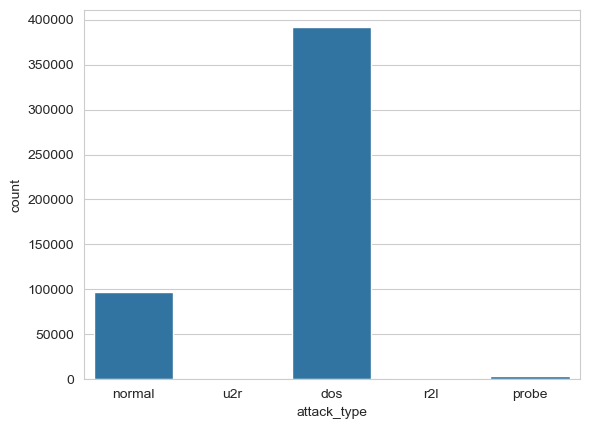

In [14]:
sns.countplot(x='attack_type', data=df)

In [15]:
df['attack_type'].value_counts()

attack_type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [16]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [17]:
df.isnull().sum() #查看控制个数

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
df._get_numeric_data().columns  #获取数字列，

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [19]:
#Finding categorical features  #找到非数字特征
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('attack_type')
cate_cols

['service', 'protocol_type', 'flag']

In [20]:
list(set(df.columns)-set(num_cols)) #非数字的列名

['attack_type', 'service', 'protocol_type', 'flag', 'target']

CATEGORICAL FEATURES DISTRIBUTION

In [21]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

In [22]:
type(df['protocol_type'].value_counts())

pandas.core.series.Series

In [ ]:
temp = df.loc[df['attack_type']=='normal',:]
temp.loc[:,'duration'].plot(kind="bar")

In [ ]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [ ]:
bar_graph('flag')

In [ ]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

In [ ]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

In [ ]:
bar_graph('attack_type')

In [ ]:
df.columns

DATA CORRELATION

In [ ]:
# 去除空值、删除只有唯一值的列，查看列之间的相关性
df = df.dropna(axis=1)
df = df[[col for col in df if df[col].nunique() > 1]]

# 对分类列进行独热编码
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# 计算相关性矩阵
corr = df_encoded.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)

In [ ]:
df

In [ ]:
#查看属性相关性，高相关的属性需要在后面删除一个，相当于去除冗余
df['num_root'].corr(df['num_compromised'])

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

In [ ]:
df['srv_count'].corr(df['count'])

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

In [ ]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

In [ ]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

In [ ]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

In [ ]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

In [ ]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

In [ ]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

In [ ]:
df

In [ ]:
#删除冗余属性
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

FEATURE MAPPING

In [ ]:
df['protocol_type'].value_counts()

In [ ]:
df

In [ ]:
#离散特征数字化
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

In [ ]:
#离散特征数字化
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.head()

In [ ]:
df.drop('service',axis = 1,inplace= True)  #这里为何删除这个列，我也不知道，看了kaggle也有人问作者这个问题，但是作者没回答

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes

MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
#数据归一化
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['attack_type']]
X = df.drop(['attack_type',], axis=1)
feature_name = X.columns.tolist()

sc = MinMaxScaler()
X = sc.fit_transform(X)
X,   feature_name

In [ ]:
data = pd.DataFrame(X, columns=feature_name)

In [ ]:
data

In [ ]:
data = pd.concat([data, labels], axis=1)
data.to_csv("./dataset/kdd_cup99_10_percent.csv")

In [ ]:
# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

GAUSSIAN NAIVE BAYES

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
model1 = GaussianNB()

In [ ]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

DECISION TREE

In [ ]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(n_estimators=40)

In [ ]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

In [ ]:
from sklearn.cluster import KMeans
Kmodel = KMeans(n_clusters=6,random_state=42)
y_pred = Kmodel.fit(X_train, Y_train)


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4 = SVC(gamma = 'scale')

In [ ]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model5 = LogisticRegression(max_iter=1200000)

In [ ]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model6 = GradientBoostingClassifier(random_state=0)

In [ ]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [ ]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [ ]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()

In [ ]:
print('Training time')
print((end-start))

In [ ]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time)

In [ ]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

In [ ]:
accuracy_score(Y_train,Y_train_pred7)

In [ ]:
accuracy_score(Y_test,Y_test_pred7)

TRAINING ACCURACY

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,99.914]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,99.886]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099,1211.54094]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416,1.72521]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('test_time_figure.png',bbox_inches='tight')